## Importing libraries

In [28]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.impute import SimpleImputer

## Loading .arff type files

In [30]:
df = arff.loadarff('3year.arff')
df = pd.DataFrame(df[0])

In [31]:
df.sample(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
6679,0.003203,0.20705,0.436860,3.29880,53.6010,0.251550,0.004386,3.829800,2.32850,0.792950,...,-0.002803,0.004039,0.99814,0.000000,87.5060,13.0480,29.789,12.2530,6.2409,b'0'
3777,-0.052821,0.37141,0.272750,1.76800,5.3826,0.000000,-0.052565,1.692500,1.42740,0.628590,...,-0.012115,-0.084031,1.03610,0.020864,5.9134,3.9013,90.821,4.0189,3.8361,b'0'
3856,0.027351,0.37138,0.254130,1.80130,-16.6820,0.159740,0.034046,1.655800,1.03970,0.614950,...,0.038230,0.044476,0.96177,0.088180,4.2186,5.2475,88.660,4.1168,3.0456,b'0'
8274,0.109000,0.52438,-0.042884,0.84931,-29.2720,0.103090,0.110460,0.751550,1.04210,0.394100,...,0.040370,0.276570,0.95963,0.608470,19.4590,12.3030,57.878,6.3063,2.3667,b'0'
4782,-0.353720,0.97381,-0.073732,0.86152,-221.9900,0.091543,-0.136310,0.026893,0.67054,0.026189,...,0.141690,-13.506000,0.86137,16.853000,2.5123,4.9769,289.830,1.2594,1.2388,b'0'


## Renaming input and target variable

In [32]:
# Rename input columns to X(n) format
input_columns = df.columns[:-1]  # Exclude the last column (target column)
renamed_input_columns = [f"X({n})" for n in range(1, len(input_columns) + 1)]
df.rename(columns=dict(zip(input_columns, renamed_input_columns)), inplace=True)

# Rename target column to 'Y'
df.rename(columns={'class': 'Y'}, inplace=True)

In [33]:
df.sample(5)

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
8284,0.079939,0.422970,0.023974,1.0876,-18.8110,-0.000767,0.080210,0.85337,1.0575,0.36095,...,0.054372,0.221470,0.94563,0.41376,17.0270,12.6620,48.6000,7.5103,2.9256,b'0'
7895,0.206340,0.040853,0.340520,9.3354,34.1540,0.000000,0.254630,23.47800,5.9773,0.95915,...,0.044054,0.215130,0.95793,0.00000,191.4000,94.2410,2.4947,146.3100,9.6622,b'0'
2429,0.070792,0.269690,0.181800,1.6741,-5.2266,0.000000,0.072384,2.70790,1.7462,0.73031,...,0.039020,0.096934,0.95865,0.00000,8.5976,28.5590,56.3740,6.4746,3.1835,b'0'
6081,0.057715,0.642680,0.150780,2.0845,-24.7630,-0.001893,0.067565,0.55598,1.2696,0.35732,...,0.075174,0.161520,0.94860,1.40950,5.7101,28.5550,39.9690,9.1320,1.7877,b'0'
10246,0.004561,0.780060,0.226170,1.3166,-3.3941,0.000000,0.006986,0.28195,1.8647,0.21994,...,0.000663,0.020739,1.00560,0.10573,8.2307,2.6879,139.8500,2.6099,31.4280,b'1'


## Understanding the data

In [34]:
# Get the shape (no of rows & columns) in our dataset

df.shape

(10503, 65)

In [35]:
# Understanding Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(1)    10503 non-null  float64
 1   X(2)    10503 non-null  float64
 2   X(3)    10503 non-null  float64
 3   X(4)    10485 non-null  float64
 4   X(5)    10478 non-null  float64
 5   X(6)    10503 non-null  float64
 6   X(7)    10503 non-null  float64
 7   X(8)    10489 non-null  float64
 8   X(9)    10500 non-null  float64
 9   X(10)   10503 non-null  float64
 10  X(11)   10503 non-null  float64
 11  X(12)   10485 non-null  float64
 12  X(13)   10460 non-null  float64
 13  X(14)   10503 non-null  float64
 14  X(15)   10495 non-null  float64
 15  X(16)   10489 non-null  float64
 16  X(17)   10489 non-null  float64
 17  X(18)   10503 non-null  float64
 18  X(19)   10460 non-null  float64
 19  X(20)   10460 non-null  float64
 20  X(21)   9696 non-null   float64
 21  X(22)   10503 non-null  float64
 22

In [36]:
df.describe()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(55),X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64)
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


## Dropping duplicate rows

In [37]:
df.shape

(10503, 65)

In [38]:
df.duplicated().sum()

87

In [39]:
df.drop_duplicates(inplace = True)

In [40]:
df.shape

(10416, 65)

## Replacing the values of target variable; replacing b'0' by 0 and b'1' by 1.

In [41]:
df['Y'].value_counts()

b'0'    9923
b'1'     493
Name: Y, dtype: int64

In [42]:
df = pd.get_dummies(df,columns=['Y'],drop_first=True)

In [43]:
# Renaming target column again to 'Y'
df.rename(columns={"Y_b'1'": 'Y'}, inplace=True)
df

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,1
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,1
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,1
10501,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,1


## Handling missing values

In [44]:
# Get the no of missing data points per column

df.isnull().sum()

X(1)       0
X(2)       0
X(3)       0
X(4)      18
X(5)      25
        ... 
X(61)     17
X(62)     43
X(63)     18
X(64)    225
Y          0
Length: 65, dtype: int64

In [45]:
# Get the percentage of missing data points per column

df.isnull().mean()*100

X(1)     0.000000
X(2)     0.000000
X(3)     0.000000
X(4)     0.172811
X(5)     0.240015
           ...   
X(61)    0.163210
X(62)    0.412826
X(63)    0.172811
X(64)    2.160138
Y        0.000000
Length: 65, dtype: float64

In [46]:
# Percentage of data that is missing

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 1.4523514120288314 % .


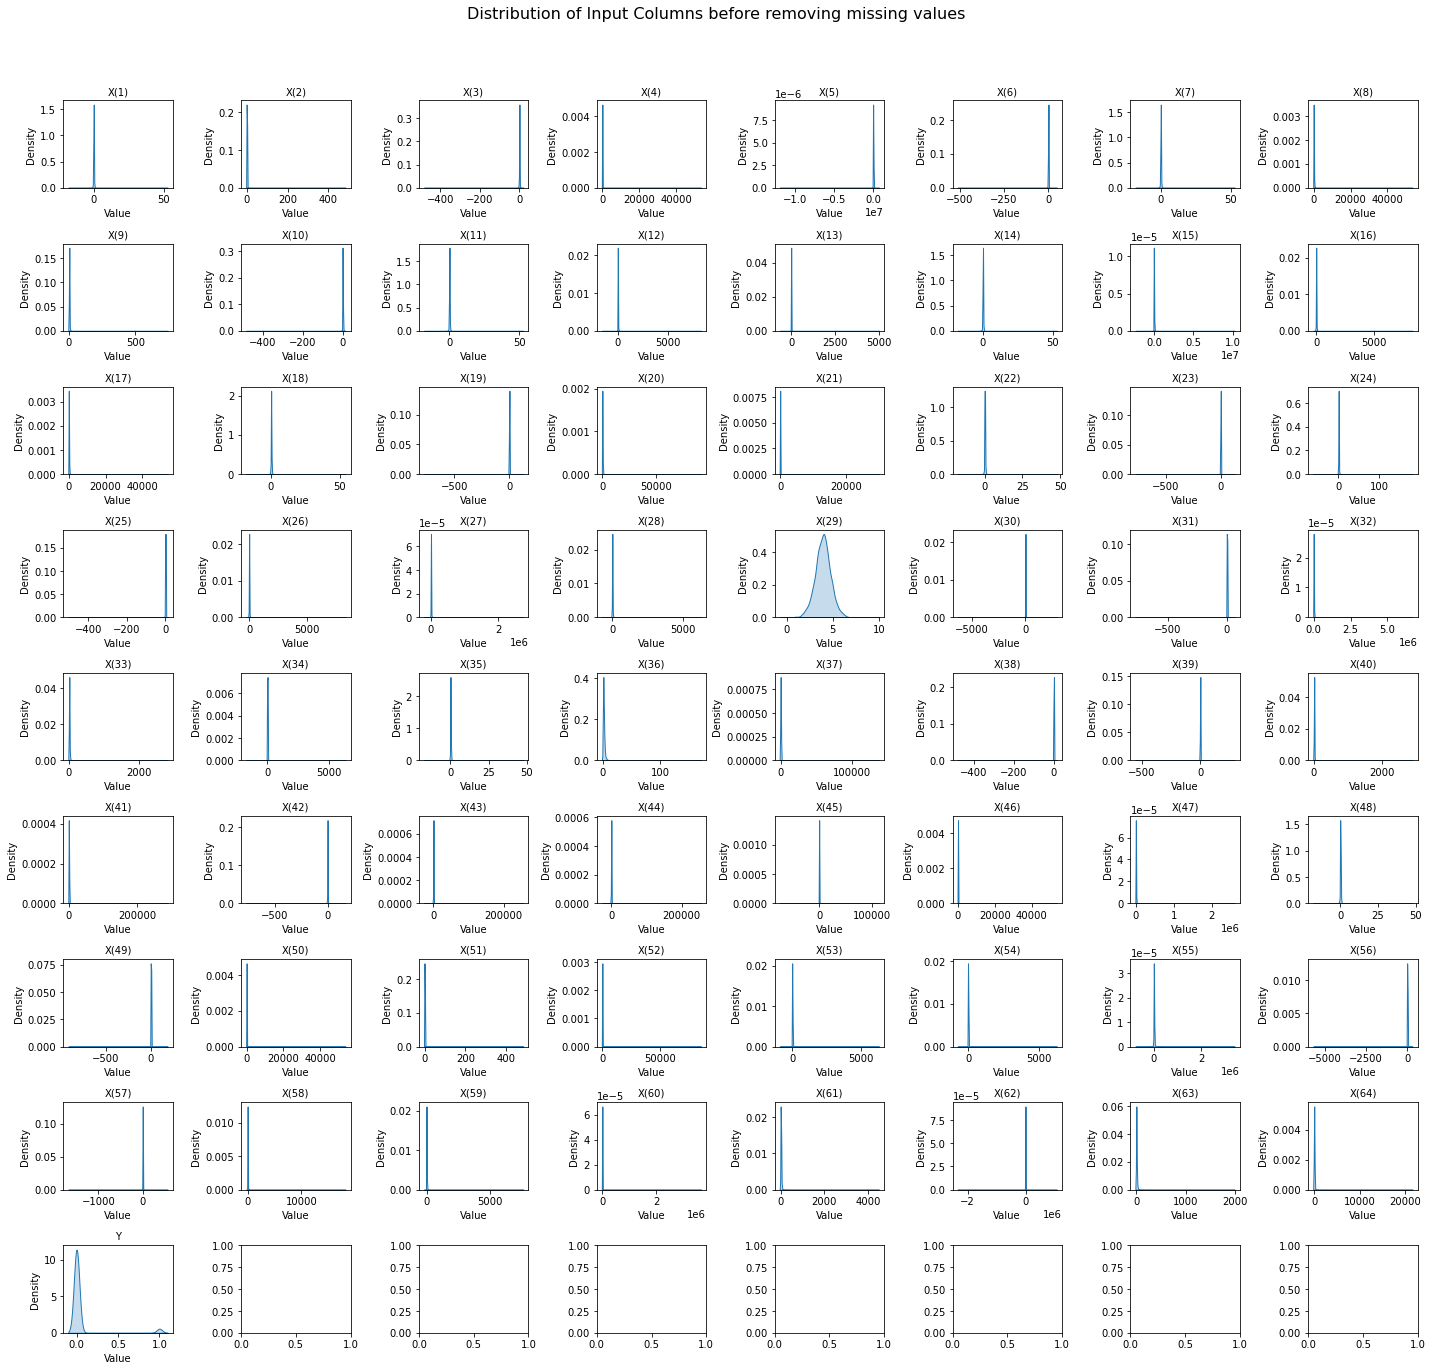

In [47]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns before removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer

def fill_missing_values(dataset):
    Y = None 
    if Y in dataset.columns:
        target = dataset[Y]
        features = dataset.drop(columns=[Y])
    else:
        features = dataset
    
    # Initialize the imputer with median
    imputer = SimpleImputer(strategy='median')
    
    # Fit and transform the features using the imputer
    filled_features = imputer.fit_transform(features)
    
    # Convert the filled features back to a DataFrame
    filled_features_df = pd.DataFrame(filled_features, columns=features.columns)
    
    # Concatenate target variable back
    if Y in dataset.columns:
        filled_features_df[Y] = target
    
    return filled_features_df

df = fill_missing_values(df)


In [49]:
# Checking again just to make sure that whether data contain missing values or not.

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 0.0 % .


In [ ]:
# Number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Creating subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns after removing missing values', fontsize=16)

# Iterating through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Dealing with Outliers

In [ ]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
import pandas as pd

def handle_outliers_iqr(df, target_col='Y', lower_limit=1.5, upper_limit=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for each column
    lower_bound = Q1 - lower_limit * IQR
    upper_bound = Q3 + upper_limit * IQR

    # Treat the outliers in each column
    for col in df.columns:
        if col != target_col:
            df[col] = df[col].apply(lambda x: lower_bound[col] if x < lower_bound[col] else x)
            df[col] = df[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else x)

    return df

# Call the function to handle outliers in the DataFrame
df = handle_outliers_iqr(df)


In [ ]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [ ]:
df.to_csv(r'df3.csv', index=False)